### Sobre o conjunto de dados
O conjunto de dados oferece informações abrangentes sobre os fatores de saúde que influenciam o desenvolvimento da osteoporose, incluindo detalhes demográficos, escolhas de estilo de vida, histórico médico e indicadores de saúde óssea. O objetivo é facilitar a pesquisa na previsão da osteoporose, permitindo que modelos de aprendizado de máquina identifiquem indivíduos em risco. A análise de fatores como idade, sexo, alterações hormonais e hábitos de vida pode ajudar a melhorar o manejo da osteoporose e as estratégias de prevenção.
  
https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis

Id	Age	Gender	Hormonal Changes	Family History	Race/Ethnicity	Body Weight	Calcium Intake	Vitamin D Intake	Physical Activity	Smoking	Alcohol Consumption	Medical Conditions	Medications	Prior Fractures	Osteoporosis
Legenda do Dataframe
- ID: identificador unico
- Age (idade): Idade do individuo em anos
- Gender(Genero): O genero do individuo. Pode ser "Masculino"ou "Feminino"
- Hormonal Changes(Mudancas Hormonais): Indica se o individuo sofreu alteracoes hormonais, principalmente relacionadas á menopausa
- Family History (Historia da Familia): Indica se há histórico familiar de Osteoporose ou fraturas. Pode ser "Sim"ou "Não"
- Race/Ethnicity (Raça/Etnia): A raça ou etnia do individuo. Isso pode incluir categorias como "caucasiano", "afro-americano","asiatico"etc.
- Body Weight (Peso Corporal): O satus do peso corporal do individuo. Isso pode ser "normal"ou "Abaixo do peso".
- Calcium Intake (Ingestão de Calcio): O nivel de ingestão de calcio na dieta do individuo. Isto pode ser "Baixo"ou "Adequado"
- Vitamin D Intake (Ingestão de Vitamina): O nivel de ingestão de vitamina D na Dieta do individuo. Pode ser "Insuficiente"ou "Suficiente"
- Physical Activity(Atividade física): Indica o nivel de atividade fisica do individuo. Pode ser "Sedentário"para baixos níveis de atividade ou "Ativo"para exercicios
- Smoking (Fuma): Se fuma ou Não
- Alcohol Consumption (Consome Alcool): Se consome bebida alcoolica ou não
- Medical Conditions (Condicao Medica): Se tem alguma doenca
- Medications (Medicacao):Se toma alguma medicacao
- Prior Fractures (Fraturas Prévias): se Tem Fraturas
- Osteoporosis (Osteoporose): Se tem osteoporose ou não 
 

### O que é a Osteoporose?

A osteoporose é uma doença em que ocorre a perda da massa óssea, fazendo com que os ossos fiquem frágeis e porosos, tornando-se consequentemente mais sensíveis e quebradiços

##############################################################################################################

In [ ]:
pip install sweetviz

### Limpeza Base de Dados

In [ ]:
# Bibliotecas utilizadas

# Visualizar dados (DataViz)
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv



#Manipulação de dados
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ler o arquivo csv em um dataframe
df = pd.read_csv('osteoporosis.csv')

# Imprimir as 5 primeiras linhas do dataframe
df.head()

In [ ]:
# Verificar os dados das colunas numericas a fim de verificar se há dados faltante
df.describe()

In [ ]:
# Verificar se há ids duplicados
duplicates = df.duplicated(subset='Id', keep=False)

# Mostrar as linhas com os ids duplicados
df_duplicates = df[duplicates]
df_duplicates

In [ ]:
# Filtrar o DataFrame para visualizar linhas com id = 107447
filtered_df = df[df['Id'] == 107447]

# Imprime o DataFrame filtrado
filtered_df

In [ ]:
# Filtrar o Dtaframe verificr as linhas com id = 101592
filtered_df = df[df['Id'] == 101592]

# mostrar o resultado do filtro
filtered_df

Conforme verificado acima, podemos perceber que há linhas com numeros de Ids iguais porém as demais colunas com informações diferentes uma das outras, sendo assim, não podemos excluir as linhas levando em consideração somente os numeros de Ids iguais.

In [ ]:
# Identificando as linhas inteiras duplicadas
duplicates = df.duplicated()

# Exibindo as linhas inteirasduplicadas
duplicates.value_counts()

Conforme podemos confirmar acima, não temos nenhuma linha que esteja duplicada. Sendo assim, não iremos excluir linhas por duplicidade de id.

In [ ]:
#Traduzir o nome das colunas para Portugues
data = df.rename(columns={'Age': 'Idade', 'Gender': 'Genero', 'Hormonal Changes': 'Mudancas Hormonais', 'Family History': 'Historico Familiar', 'Race/Ethnicity': 'Raça/Etnia', 'Body Weight': 'Peso Corporal', 'Calcium Intake': 'Ingestao de Calcio', 'Vitamin D Intake': 'Ingestao de Vitamina D', 'Physical Activity': 'Atividade Fisica', 'Smoking': 'Fuma', 'Alcohol Consumption': 'Consome Bebida Alcoolica', 'Medical Conditions': 'Condicao Medica', 'Medications': 'Medicacao', 'Prior Fractures': 'Fraturas Previas', 'Osteoporosis':'Osteoporose'})
data

In [ ]:
# Apagar a coluna ID
data = data.drop('Id', axis=1)
data

In [ ]:
# Informacoes basica do dataframe
print(data.info())

data


#### Coluna Idade

In [ ]:
# Verificar a idade minima e maxima listada no Dataframe
idade_minima = data['Idade'].min()
print(f"A idade mínima do Dataset é: {idade_minima}")

idade_maxima = data['Idade'].max()
print(f"A idade máxima do Dataset é: {idade_maxima}")

In [ ]:
# Quantidade de casos no Dataset de idade de 18 ate 29 anos
quantidade_casos_18_29 = len(data[(data['Idade'] >= 18) & (data['Idade'] <= 29)])
print(f"A quantidade de casos de 18 anos a 29 anos no Dataset é: {quantidade_casos_18_29}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 30 ate 39 anos
quantidade_casos_30_39 = len(data[(data['Idade'] >= 30) & (data['Idade'] <= 39)])
print(f"A quantidade de casos de 30 anos a 39 anos no Dataset é: {quantidade_casos_30_39}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 40 ate 49 anos
quantidade_casos_40_49 = len(data[(data['Idade'] >= 40) & (data['Idade'] <= 49)])
print(f"A quantidade de casos de 40 anos a 49 anos no Dataset é: {quantidade_casos_40_49}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 50 ate 59 anos
quantidade_casos_50_59 = len(data[(data['Idade'] >= 50) & (data['Idade'] <= 59)])
print(f"A quantidade de casos de 50 anos a 59 anos no Dataset é: {quantidade_casos_50_59}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 60 ate 69 anos
quantidade_casos_60_69 = len(data[(data['Idade'] >= 60) & (data['Idade'] <= 69)])
print(f"A quantidade de casos de 60 anos a 69 anos no Dataset é: {quantidade_casos_60_69}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 70 ate 79 anos
quantidade_casos_70_79 = len(data[(data['Idade'] >= 70) & (data['Idade'] <= 79)])
print(f"A quantidade de casos de 70 anos a 79 anos no Dataset é: {quantidade_casos_70_79}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 80 ate 90 anos
quantidade_casos_80_90 = len(data[(data['Idade'] >= 80) & (data['Idade'] <= 90)])
print(f"A quantidade de casos de 80 anos a 90 anos no Dataset é: {quantidade_casos_80_90}")

In [ ]:

# Quantidade de casos no Dataset de idade de 18 ate 29 anos que tem Osteoporose
quantidade_casos_18_29 = len(data[(data['Idade'] >= 18) & (data['Idade'] <= 29) & (data['Osteoporose'] == 1)])
print(f"A quantidade de casos que tem Osteoporose de 18 anos a 29 anos no Dataset é: {quantidade_casos_18_29}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 30 ate 39 anos que tem Osteoporose
quantidade_casos_30_39 = len(data[(data['Idade'] >= 30) & (data['Idade'] <= 39) & (data['Osteoporose'] == 1)])
print(f"A quantidade de casos que tem Osteoporose de 30 anos a 39 anos no Dataset é: {quantidade_casos_30_39}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 40 ate 49 anos que tem Osteoporose
quantidade_casos_40_49 = len(data[(data['Idade'] >= 40) & (data['Idade'] <= 49) & (data['Osteoporose'] == 1)])
print(f"A quantidade de casos que tem Osteoporose de 40 anos a 49 anos no Dataset é: {quantidade_casos_40_49}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 50 ate 59 anos que tem Osteoporose
quantidade_casos_50_59 = len(data[(data['Idade'] >= 50) & (data['Idade'] <= 59) & (data['Osteoporose'] == 1)])
print(f"A quantidade de casos que tem Osteoporose de 50 anos a 59 anos no Dataset é: {quantidade_casos_50_59}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 60 ate 69 anos que tem Osteoporose
quantidade_casos_60_69 = len(data[(data['Idade'] >= 60) & (data['Idade'] <= 69) & (data['Osteoporose'] == 1)])
print(f"A quantidade de casos que tem Osteoporose de 60 anos a 69 anos no Dataset é: {quantidade_casos_60_69}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 70 ate 79 anos que tem Osteoporose
quantidade_casos_70_79 = len(data[(data['Idade'] >= 70) & (data['Idade'] <= 79) & (data['Osteoporose'] == 1)])
print(f"A quantidade de casos que tem Osteoporose de 70 anos a 79 anos no Dataset é: {quantidade_casos_70_79}")

print('###################################################################################')

# Quantidade de casos no Dataset de idade de 80 ate 90 anos que tem Osteoporose
quantidade_casos_80_90 = len(data[(data['Idade'] >= 80) & (data['Idade'] <= 90) & (data['Osteoporose'] == 1)])
print(f"A quantidade de casos que tem Osteoporose de 80 anos a 90 anos no Dataset é: {quantidade_casos_80_90}")

No Dataset temos:
- 951 casos no dataset de pessoas entre 18 a 29 anos e desses 951 casos, 157 deles foram diagnosticados com Osteoporose, significando assim que 16,51% são pessoas com Osteoporose na idade entre 18 a 29 anos;
- 314 casos no dataset de pessoas entre 30 a 39 anos e desses 314 casos, 129 deles foram diagnosticados com Osteoporose, significando que 41,08% são pessoas com Osteoporose na idade entre 30 a 39 anos;
- 138 casos no dataset de pessoas entre 40 a 49 anos e desses 138 casos todos foram diagnosticado com Osteoporose.
- 140 casos no dataset de pessoas entre 50 a 59 anos e desses 140 casos todos foram diagnosticados com Osteoporose.
- 135 casos no dataset de pessoas entre 60 a 69 anos e desses 135 casos todos foram diagnosticados com Osteoporose.
- 146 casos no dataset de pessoas entre 70 a 79 anos e desses 146 casos todos foram diagnosticados com Osteoporose.
- 134 casos no dataset de pessoas entre 80 a 90 anos e desses 134 casos todos foram diagnosticados com Osteoporose.

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Genero'
counts = data['Idade'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Genero
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Cioluna Genero
plt.title('Contagem Idade')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

#### Coluna Genero

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Genero'
counts = data['Genero'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Genero
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Cioluna Genero
plt.title('Contagem Valores Genero')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Faça o one-hot encoding da coluna categorica "Genero"
df_one_hot = pd.get_dummies(data, columns=["Genero"])

# Exiba o DataFrame atualizado
df_one_hot.head()

In [ ]:
# Alterar os dados das colunas Genero_Female e Genero_Male de True para 1 e False para 0

df_one_hot['Genero_Female'] = df_one_hot['Genero_Female'].map({True: 1, False: 0})
df_one_hot['Genero_Male'] = df_one_hot['Genero_Male'].map({True: 1, False: 0})

# Verificar
df_one_hot

In [ ]:
# alterar os dados das colunas Genero_Female e Genero_Male para tipo int
df_one_hot['Genero_Female'] = df_one_hot['Genero_Female'].astype(int)
df_one_hot['Genero_Male'] = df_one_hot['Genero_Male'].astype(int)

#verificar as alteracoes 
df_one_hot.info()

A coluna Genero é uma coluna que o tipo é object, tendo quantidade de sexo bem parecida, sendo casos masculino 26 a mais que o feminino em uma base com total de 1958 dados por coluna, sendo assim, são dados balanceados para o estudo.
No caso em questão alteramos o tipo de dado de object para int.

#### Coluna Mudancas hormonais

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Mudancas Hormonais'
counts = df_one_hot['Mudancas Hormonais'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Mudancas Hormonais
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Mudancas Hormonais
plt.title('Contagem Valores Mudancas Hormonais')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de Normal para 0 e Postmenopausal para 1
df_one_hot['Mudancas Hormonais'] = df_one_hot['Mudancas Hormonais'].apply(lambda x: 0 if x == 'Normal' else 1 if x == 'Postmenopausal' else df_one_hot['Mudancas Hormonais'])
df_one_hot

In [ ]:
# Filtrar casos de Homens que estejam cadastrados como pos menopausa
df_novo = df_one_hot[((df_one_hot['Mudancas Hormonais'] == 1) & (df_one_hot['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo)

print('Quantidade de homens pos menopausa é de:')
print(num_rows)

In [ ]:
# Filtrar casos de Homens que estejam cadastrados como pos menopausa onde mulheres nao estejam para verificar se o dado acima esta correto
df_novo = df_one_hot[((df_one_hot['Mudancas Hormonais'] == 1) & (df_one_hot['Genero_Male'] == 1) & (df_one_hot['Genero_Female'] == 0))]
# Contagem de numero de linhas
num_rows = len(df_novo)

print('Numero de homens que estão cadastrados como pos menopausa e mulher não é:')
print(num_rows)

In [ ]:
# Verificar como ficou o data set
df_novo.head()

no caso há 486 casos onde homens estão cadastrados como se estivessem Pos menopausa,no caso essa é uma condição somente feminina, sendo assim, no caso em questão, iremos deletar essas informações pois nao conseguimos aferir se foi cadastrado o Genero errado ou as mudancas hormonais errada.

In [ ]:
# Filtrar casos de Homens que estejam cadastrados como pos menopausa onde mulheres nao estejam para verificar se o dado acima esta correto
df_novo = df_one_hot[((df_one_hot['Mudancas Hormonais'] == 1) & (df_one_hot['Genero_Male'] == 1) & (df_one_hot['Genero_Female'] == 0))]

# Apagar os dados filtrados do conjunto de dados original
df_one_hot = df_one_hot.drop(df_novo.index)

print(df_one_hot)

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Mudancas Hormonais'
counts = df_one_hot['Mudancas Hormonais'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Mudancas Hormonais
print(counts)

In [ ]:
# Verificar se o tipo dos dados da coluna Mudancas hormonais foram alteradas de object para int
df_one_hot.info()

Podemos verificar que a coluna Mudancas Hormonais temos 981 casos como normal e agora após a exclusão de homens cadastrados como menopaulsa temos 491 casos como Postmenopausal, ficando 0 para os casos identificados como Normal e 1 para os casos identificados como Postmenopausal.

#### Coluna Historico Familiar

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Historico Familiar'
counts = df_one_hot['Historico Familiar'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Historico Familiar
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Historico Familiar
plt.title('Contagem Valores Historico Familiar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de No para 0 e Yes para 1
df_one_hot['Historico Familiar'] = df_one_hot['Historico Familiar'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else df_one_hot['Historico Familiar'])
df_one_hot

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Historico Familiar'
counts = df_one_hot['Historico Familiar'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Historico Familiar
print(counts)

In [ ]:
# Verificar se o tipo dos dados da coluna  Historico Familiar foram alteradas de object para int
df_one_hot.info()

Podemos verificar que a coluna Historico Familiar temos 760 casos que não possuem historico familiar e 712 que possuem historico familia, sendo casos 48 casos a mais no dataframe dos que possuem historico familia com osteoporose.
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos onde não há historico na familia e 1 para os casos identificados que há historico familiar.

#### Coluna Raça/Etnia

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia'
counts = df_one_hot['Raça/Etnia'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Raça/Etnia
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia
plt.title('Contagem Valores Raça/Etnia')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Faça o one-hot encoding da coluna categorica "Raça/Etnia"
df = pd.get_dummies(df_one_hot, columns=["Raça/Etnia"])

# Exiba o DataFrame atualizado
df.head()

In [ ]:
# Alterar os dados das colunas Raca/Etnia_African American, Raça/Etnia_Asian e Raça/Etnia_Caucasian  de True para 1 e False para 0

df['Raça/Etnia_African American'] = df['Raça/Etnia_African American'].map({True: 1, False: 0})
df['Raça/Etnia_Asian'] = df['Raça/Etnia_Asian'].map({True: 1, False: 0})
df['Raça/Etnia_Caucasian'] = df['Raça/Etnia_Caucasian'].map({True: 1, False: 0})

# Verificar
df

A coluna Raça/Etnia é uma coluna que contem tres tipos de Etnias, tendo as 3 Racas/Etnias quantidades bem aproximadas de casos de cada uma, sendo , Raça/Etnia_African American que tem 509 casos, a Raça/Etnia_Asian tendo 470 casos sendo 39 casos a menos do African American e Raça/Etnia_Caucasian tendo 493 casos sendo 16 a menos que African American e 23 acima do Asian, entando equiparados em mais de 450 casos cada um, sendo assim, considera-se dados balanceados nessa coluna.
No caso em questão alteramos o tipo de dado de object para int.

#### Coluna Peso Corporal

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia'
counts = df['Peso Corporal'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Raça/Etnia
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia
plt.title('Contagem Valores Peso Corporal')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de Normal para 0 e Underweight para 1
df['Peso Corporal'] = df['Peso Corporal'].apply(lambda x: 0 if x == 'Normal' else 1 if x == 'Underweight' else df['Peso Corporal'])
df

In [ ]:
# Verificar se o tipo dos dados da coluna  Peso Corporal foram alteradas de object para int
df.info()

Podemos verificar que na coluna Peso Corporal temos 766 casos como Normal e 706 casos como Abaixo do Peso, sendo casos considerados como Peso Corporal Normal sendo 60  a mais dos que os considerados abaixo do peso. 
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Normal e 1 para os casos identificados como abaixo do peso.

#### Coluna Ingestao de Calcio

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Ingestao de Calcio'
counts = df['Ingestao de Calcio'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Ingestao de Calcio
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Ingestao de Calcio
plt.title('Contagem Valores Ingestao de Calcio')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Ingestao de Calcio'
counts = df['Ingestao de Calcio'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna Ingestao de Calcio
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Ingestao de Calcio
plt.title('Contagem Valores Ingestao de Calcio')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de Adequate para 0 e Low para 1
df['Ingestao de Calcio'] = df['Ingestao de Calcio'].apply(lambda x: 0 if x == 'Adequate' else 1 if x == 'Low' else df['Ingestao de Calcio'])
df

In [ ]:
# Verificar se o tipo dos dados da coluna Ingestao de Dados  foram alteradas de object para int
df.info()

Podemos verificar que na coluna Ingestão de Calcio temos 759 casos como Abaixo e 713 casos como Adequado, sendo casos considerados como Ingestao de Calcio Abaixo 46  a mais dos que os considerados a ingestao de calcio adequada. 
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Adequatte e 1 para os casos identificados como Low .

#### Coluna Ingestao de Vitamina D 

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Ingestao de Vitamina D'
counts = df['Ingestao de Vitamina D'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Ingestao de Vitamina D
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Ingestao de Vitamina D
plt.title('Contagem Valores Ingestao de Vitamina D')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de Adequate para 0 e Low para 1
df['Ingestao de Vitamina D'] = df['Ingestao de Vitamina D'].apply(lambda x: 0 if x == 'Sufficient' else 1 if x == 'Insufficient' else df['Ingestao de Vitamina D'])
df

In [ ]:
# Verificar se o tipo dos dados da coluna  Ingestao de Vitamina D foram alteradas de object para int
df.info()

Podemos verificar que na coluna Ingestao de Vitamina D temos 751 casos como Suficiente e 721 casos como insuficiente, sendo casos considerados como Ingestao de Vitamina D suficiente 30 a mais dos que os considerados  Ingestao de Vitamina D insuficiente. 
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Suficiente e 1 para os casos identificados como Insuficiente .

#### Coluna Atividade Fisica

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Ingestao de Vitamina D'
counts = df['Atividade Fisica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Ingestao de Vitamina D
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Ingestao de Vitamina D
plt.title('Contagem Valores Atividade Fisica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de Active para 0 e Sedentary para 1
df['Atividade Fisica'] = df['Atividade Fisica'].apply(lambda x: 0 if x == 'Active' else 1 if x == 'Sedentary' else df['Atividade Fisica'])
df

In [ ]:
# Verificar se o tipo dos dados da coluna  Atividade Fisica foram alteradas de object para int
df.info()

Podemos verificar que na coluna de Atividade Fisica temos 769 casos como Ativos e 703 casos como Sedentarios, sendo casos considerados como Ativos 66  a mais dos que os considerados Sedentarios. 
Nos dados da coluna em questao, alteramos de object para int, ficando 0 para os casos identificados como Ativos e 1 para os casos identificados como Sedentarios .

#### Coluna Fuma

In [ ]:
# contar o número de ocorrências de cada valor único na coluna de 'Fumantes'
counts = df['Fuma'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Fumantes
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Fumantes
plt.title('Contagem Valores Fumantes')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de No para 0 e Yes para 1
df['Fuma'] = df['Fuma'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else df['Fuma'])
df

In [ ]:
# Verificar se o tipo dos dados da coluna Fuma foram alteradas de object para int
df.info()

Podemos verificar que na coluna de Fuma temos 744 casos como Yes fumantes e 728 casos como No Fuma, sendo casos considerados como Fumantes 16  a mais dos que os considerados não fumantes. 
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos identificados como não fumantes e 1 para os casos identificados como Fumantes .

#### Coluna Consome Bebida Alcoolica

In [ ]:
# contar o número de ocorrências de cada valor único na coluna de 'Consome Bebida Alcoolica'
counts = df['Consome Bebida Alcoolica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Fumantes
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Fumantes
plt.title('Contagem Valores Consome Bebida Alcoolica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# No lugar dos valores NaN colocar No
df['Consome Bebida Alcoolica'] = df['Consome Bebida Alcoolica'].fillna('No')
df

In [ ]:
# Verificar se as modificacoes foram realizadas dos dados Nan para No
# contar o número de ocorrências de cada valor único na coluna de 'Consome Bebida Alcoolica'
counts = df['Consome Bebida Alcoolica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Fumantes
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Fumantes
plt.title('Contagem Valores Consome Bebida Alcoolica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de No para 0 e Moderate para 1
df['Consome Bebida Alcoolica'] = df['Consome Bebida Alcoolica'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Moderate' else df['Consome Bebida Alcoolica'])
df

In [ ]:
# Verificar se o tipo dos dados da coluna Consome Bebida Alcoolica foram alteradas de object para int
df.info()

Podemos verificar que na coluna Consome Bebida Alcoolica temos 738 casos como Moderate Consome Bebida Alcoolicas 734 casos como No Consome Bebidas Alcoolicas, sendo casos considerados como Nao consome bebida alcoolicas 04  a mais dos que os que consomem bebida alcoolica moderadamente. 
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos identificados como não fumantes e 1 para os casos identificados como Fumantes .

#### Coluna Condicao Medica

In [ ]:

# contar o número de ocorrências de cada valor único na coluna de 'Condicao Medica'
counts = df['Condicao Medica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Condicao Medica
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Condicao Medica
plt.title('Contagem Valores Condicao Medica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# No lugar dos valores NaN colocar No
df['Condicao Medica'] = df['Condicao Medica'].fillna('No')
df

In [ ]:

# contar o número de ocorrências de cada valor único na coluna de 'Condicao Medica'
counts = df['Condicao Medica'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Condicao Medica
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Condicao Medica
plt.title('Contagem Valores Condicao Medica')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Faça o one-hot encoding da coluna " Condicao Medica "
df_condicao = pd.get_dummies(df, columns=["Condicao Medica"])

# Exiba o DataFrame atualizado
df_condicao.head()

In [ ]:
# Alterar os dados das colunas Medica_Hyperthyroidism e Condicao Medica_Rheumatoid Arthritis de True para 1 e False para 0

df_condicao['Condicao Medica_Hyperthyroidism'] = df_condicao['Condicao Medica_Hyperthyroidism'].map({True: 1, False: 0})
df_condicao['Condicao Medica_Rheumatoid Arthritis'] = df_condicao['Condicao Medica_Rheumatoid Arthritis'].map({True: 1, False: 0})
df_condicao['Condicao Medica_No'] = df_condicao['Condicao Medica_No'].map({True: 1, False: 0})

# Verificar
df_condicao

In [ ]:
# Verificar se o tipo dos dados da coluna Condicao Medica foram alteradas de object para int
df_condicao.info()

Podemos verificar que na coluna 
Condicao Medica temos 513 casos como Hyperthyroidism , 474 como Rheumatoid Arthritis e 485 como No. 
Nos dados da coluna em questão, alteramos de object para int .

#### Coluna Medicacao

In [ ]:

# contar o número de ocorrências de cada valor único na coluna de 'Medicacao'
counts = df_condicao['Medicacao'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Medicacao
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Medicacao
plt.title('Contagem Valores Medicacao')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# No lugar dos valores NaN colocar No
df_condicao['Medicacao'] = df_condicao['Medicacao'].fillna('No')
df_condicao

In [ ]:

# contar o número de ocorrências de cada valor único na coluna de 'Medicacao'
counts = df_condicao['Medicacao'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Medicacao
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Medicacao
plt.title('Contagem Valores Medicacao')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de No para 0 e Corticosteroids para 1
df_condicao['Medicacao'] = df_condicao['Medicacao'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Corticosteroids' else df_condicao['Medicacao'])
df_condicao

In [ ]:
# Verificar se o tipo dos dados da coluna Medicacao foram alteradas de object para int
df_condicao.info()

Podemos verificar que na coluna Medicacao temos 733 casos como Corticosteroids e 739 casos como No utiliza medicamentos, sendo casos considerados como Nao consome medicamentos 06  a mais dos que os que consomem Corticosteroids. 
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos identificados como não fumantes e 1 para os casos identificados como Fumantes .

#### Coluna Fraturas Previas

In [ ]:

# contar o número de ocorrências de cada valor único na coluna de 'Fraturas Previas'
counts = df_condicao['Fraturas Previas'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacao na coluna de Fraturas Previas
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna de Fraturas Previas
plt.title('Contagem Valores Fraturas Previas')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
# Modificar os dados de No para 0 e Yes para 1
df_condicao['Fraturas Previas'] = df_condicao['Fraturas Previas'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else df_condicao['Fraturas Previas'])
df_condicao

In [ ]:
# Verificar se o tipo dos dados da coluna Fraturas Previas foram alteradas de object para int
df_condicao.info()

Podemos verificar que na coluna Fraturas Previas temos 744 casos como Yes e 728 casos como No tem Fraturas Previas, sendo casos considerados como tem Fraturas Previas 16  a mais dos que os que nao tem Fraturas Previas. 
Nos dados da coluna em questão, alteramos de object para int, ficando 0 para os casos identificados como não Fraturas Previas e 1 para os casos identificados como Fraturas Previas .

#### Salvar Dataframe Modificado

In [ ]:
# Salvar o Dataframe alterado
df_condicao.to_csv('Osteoporose_atual.csv', index=False)

### DataViz (Visualização)

In [ ]:
pip install skimpy

In [ ]:
# Bibliotecas utilizadas

#Manipulação de dados
import pandas as pd
import numpy as np

# Visualizar dados (DataViz)
import matplotlib.pyplot as plt
import seaborn as sns
import lux
import sweetviz as sv


# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ler o arquivo csv em um dataframe
df = pd.read_csv('Osteoporose_atual.csv')

# Imprimir as 5 primeiras linhas do dataframe
df.head()

In [ ]:
import matplotlib.pyplot as plt

# Set the style to darkgrid (use parentheses instead of square brackets)
sns.set_style('darkgrid')

# Assuming df is your DataFrame
df.hist(figsize=(15,15))  

# Show the plot
plt.show()

In [ ]:
# analise dos dados com Sweetviz
dados = sv.analyze(df)

# Visualizando o relatorio com Sweetviz
dados.show_notebook()

In [ ]:
# Calcular Correlaçao da Matriz
corr_matrix = df.corr()

# Visualizar a correlação da Matriz usando Mapa de Calor (Heatmap)
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import pygwalker as pyg
walker = pyg.walk(df)
walker

In [ ]:
# Verificar se o tipo dos dados da coluna Condicao Medica foram alteradas de object para int
df_condicao.info()

### Idade que tem mais Casos de Pessoas Com Osteoporose?

In [ ]:
# Trazer somente os dados onde a coluna osteoporose for igual a 1, onde indica que tem osteoporose
data_Idade = df[df['Osteoporose'] == 1]
data_Idade

In [ ]:
data_Idade.info()

In [ ]:
# analise dos dados com Sweetviz
dados = sv.analyze(data_Idade)

# Visualizando o relatorio com Sweetviz
dados.show_notebook()

In [ ]:
# Filter the dataframe to only include rows where Osteoporose is True
osteoporose_cases = data_Idade[data_Idade['Osteoporose'] == 1]

# Group the filtered dataframe by 'Idade' and count the number of cases
idade_counts = osteoporose_cases['Idade'].value_counts().sort_values(ascending=True)

# Plot the results
plt.figure(figsize=(20, 15))
idade_counts.plot(kind='bar')
plt.title('Idades com mais casos de Osteoporose')
plt.xlabel('Idade')
plt.ylabel('Número de casos')
plt.show()

In [ ]:
data_Idade_18 = data_Idade[data_Idade['Idade'] == 18]
data_Idade_18

#### Quem tem mais casos de Osteoporose, Homem ou Mulher?

In [ ]:
# Trazer somente os dados onde a coluna osteoporose for igual a 1, onde indica que tem osteoporose
data_Genero = df[df['Osteoporose'] == 1]
data_Genero

In [ ]:
data_Genero.info()

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Genero_Female'
counts = data_Genero['Genero_Female'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Genero_Female
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Genero_Female
plt.title('Contagem Valores Genero_Female Que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

print('############################################################')

# contar o número de ocorrências de cada valor único na coluna 'Genero_Male'
counts = data_Genero['Genero_Male'].value_counts()
counts.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Genero_Male
print(counts)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Genero_Male
plt.title('Contagem Valores Genero_Male Que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

No Dataframe em questão podemos verificar que nos casos onde foram detectados Osteoporose, total são 979, sendo 502 casos homens e 477 Casos Mulheres. Sendo 4,99% mais casos onde Homens foram detecdados com Osteoporose do que mulheres.

Porém, no Dataframe em questão há total de casos Male igual a 502 sendo   02,63% a mais que os casos de Female que tem o total de 477 casos.
Tirando a porcentagem a mais que há nos casos sem a medição da diferenca de casos e a porcentagem que há de casos a mais, fica 02,36% casos onde Homem tem Osteoporose a mais do que as Mulheres.



#### Qual Raça Etnia tem mais casos de Osteoporose?

In [ ]:
# Trazer somente os dados onde a coluna osteoporose for igual a 1, onde indica que tem osteoporose
data_Raça_Etnia = df[df['Osteoporose'] == 1]
data_Raça_Etnia

In [ ]:
# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia_African American'
counts_American = data_Raça_Etnia['Raça/Etnia_African American'].value_counts()
counts_American.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Raça/Etnia_African American
print(counts_American)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia_African American
plt.title('Contagem Valores Raça/Etnia_African que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

print('############################################################')

# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia_Asian'
counts_Asian = data_Raça_Etnia['Raça/Etnia_Asian'].value_counts()
counts_Asian.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Raça/Etnia_Asian
print(counts_Asian)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia_Asian
plt.title('Contagem Valores Raça/Etnia_Asian Que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

print('############################################################')

# contar o número de ocorrências de cada valor único na coluna 'Raça/Etnia_Caucasian'
counts_Caucasian = data_Raça_Etnia['Raça/Etnia_Caucasian'].value_counts()
counts_Caucasian.plot(kind='bar')

# visualizar quantidade de cada informacoes na coluna Raça/Etnia_Caucasian
print(counts_Caucasian)

# Visualizar Graficamente a quantidade de cada informacao da Coluna Raça/Etnia_Caucasian
plt.title('Contagem Valores Raça/Etnia_Caucasian Que tem Osteoporose')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

Conforme podemos verificar acima :
- African American tem total de casos de 681, sendo 344 diagnosticados com Osteoporose.
- Asian tem total de casos de 631, sendo 314 casos diagnosticados com Osteoporose.
- Caucasian tem total de casos de 646, sendo 321 casos diagnosticados com Osteoporose.

De 979 casos de Osteoporose no Dataframe, casos de Raça Etnia:
- African American tem 35,14% de casos de Osteoporose
- Asian tem 32,07% de casos de Osteoporose
- Caucasian tem 32,79% de casos de Osteoporose.

Porém, verificando casos totais, a Raca Etnia:
-  Asian tem 631 casos no Dataframe, sendo 314 casos diagnosticado com Osteoporose. Casos de Asian diagnosticados com osteoporose é de 49,76% perante a sua população total.
  
-  African American tem 681 casos no Dataframe que correspondem a 07,92% a mais que os casos de Raça/Etnia Asian, sendo 344 casos diagnosticados com Osteoporose.Casos de Caucasian diagnosticados com osteoporose é de 50,51% perante a sua população total.  


-  Caucasian tem 646 casos no Dataframe que correspondem a 02,37% a mais que os casos de Raça/Etnia Asian, sendo 321 casos diagnosticados com Osteoporose. Casos de African American diagnosticados com osteoporose é de 49,69% perante a sua população total. 


Sendo assim, podemos concluir que a Raça/Etnia que tem mais casos de Osteoporose é African American


##### Qual Sexo da Raça/Etnia Asian tem mais casos de Osteoporose?

In [ ]:
# Filtrar a Mulheres Asiaticas
df_novo_F_Total = df[((df['Raça/Etnia_Asian'] == 1) & (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo_F_Total)

print('Numero de Mulheres Asiaticas na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Mulheres Asiaticas que tenham Osteoporose
df_novo_F_Total_Osteoporose = df[((df['Raça/Etnia_Asian'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo_F_Total_Osteoporose)

print('Numero de Mulheres Asiaticas que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Homens Asiaticas
df_novo_M_Total = df[((df['Raça/Etnia_Asian'] == 1) & (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo_M_Total)

print('Numero de Homens Asiaticos na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Mulheres Asiaticas que tenham Osteoporose
df_novo_M_Total_Osteoporose = df[((df['Raça/Etnia_Asian'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_novo_M_Total_Osteoporose)

print('Numero de Homens Asiaticos que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# criar uma figura com dois subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plota as contagens de valores para cada coluna
# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts1 = df_novo_M_Total_Osteoporose['Osteoporose'].value_counts()
counts1.plot(kind='bar', color='White', label='Não Osteoporose', ax=ax[0])
counts1.plot(kind='bar', color='blue', label='Com Osteoporose', ax=ax[0])
ax[0].set_title('Homens')
ax[0].set_xlabel('Com Osteoporose')
ax[0].set_ylabel('Count')
ax[0].legend()
print(f'Homens Asiaticos com {counts1}')

# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts2 = df_novo_F_Total_Osteoporose['Osteoporose'].value_counts()
counts2.plot(kind='bar', color='blue', label='Não Osteoporose', ax=ax[1])
counts2.plot(kind='bar', color='pink', label='Com Osteoporose', ax=ax[1])
ax[1].set_title('Mulheres')
ax[1].set_xlabel('Com Osteoporose')
ax[1].set_ylabel('Quantidade')
ax[1].legend()
print(f'Mulheres Asiaticas com {counts2}')

# Titulo do grafico
fig.suptitle('Contagem Valores de Osteoporose por Genero Raça Asian')

# Mostrar o plot
plt.show()

Sendo assim, conforme podemos verificar casos das Pessoas de Raça Asiatica:
  - Mulheres Asiaticas: Na Base de Dados em questão há total de casos de Mulheres Asiáticas 316 casos sendo 149 casos onde foram diagnosticadas com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Mulheres Asiaticas a porcentagem é de 47,16%.
  - Homens Asiaticos: Na Base de Dados em questão há total de casos de Homens Asiáticos 315 casos sendo 165 casos onde foram diagnosticados com Osteoporose. 52,39%. Verificando o total de casos com os casos diagnosticados com osteoporose em Homens Asiaticas a porcentagem é de 52,39%
  
Nos casos de Asiaticos, tem mais casos de Homem com Osteoporose a Mulher asiatica com Osteoporose.

##### Qual Sexo da Raça/Etnia African American tem mais casos de Osteoporose?

In [ ]:
# Filtrar a Mulheres African American
df_American_F_Total = df[((df['Raça/Etnia_African American'] == 1) & (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_American_F_Total)

print('Numero de Mulheres African American na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Mulheres African American que tenham Osteoporose
df_American_F_Total_Osteoporose = df[((df['Raça/Etnia_African American'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_American_F_Total_Osteoporose)

print('Numero de Mulheres African American que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar Homens African American que tenham na Base de Dados
df_American_M_Total = df[((df['Raça/Etnia_African American'] == 1) & (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_American_M_Total)

print('Numero de Homens African American na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar Homens African American que tenham Osteoporose
df_American_M_Total_Osteoporose = df[((df['Raça/Etnia_African American'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_American_M_Total_Osteoporose)

print('Numero de Homens African American que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# criar uma figura com dois subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plota as contagens de valores para cada coluna
# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts1 = df_American_M_Total_Osteoporose['Osteoporose'].value_counts()
counts1.plot(kind='bar', color='White', label='Não Osteoporose', ax=ax[0])
counts1.plot(kind='bar', color='blue', label='Com Osteoporose', ax=ax[0])
ax[0].set_title('Homens')
ax[0].set_xlabel('Com Osteoporose')
ax[0].set_ylabel('Count')
ax[0].legend()
print(f'Homens American African com {counts1}')

# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts2 = df_American_F_Total_Osteoporose['Osteoporose'].value_counts()
counts2.plot(kind='bar', color='blue', label='Não Osteoporose', ax=ax[1])
counts2.plot(kind='bar', color='pink', label='Com Osteoporose', ax=ax[1])
ax[1].set_title('Mulheres')
ax[1].set_xlabel('Com Osteoporose')
ax[1].set_ylabel('Quantidade')
ax[1].legend()
print(f'Mulheres American African com {counts2}')

# Titulo do grafico
fig.suptitle('Contagem Valores de Osteoporose por Genero Raça American African')

# Mostrar o plot
plt.show()

Sendo assim, conforme podemos verificar casos das Pessoas de Raça American African:
  - Mulheres American African: Na Base de Dados em questão há total de casos de Mulheres American African 340 casos sendo 170 casos onde foram diagnosticadas com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Mulheres American African a porcentagem é de 50% das mulheres American African que constam na Base de Dados foram dignosticadas com Osteoporose.
  
  - Homens American African: Na Base de Dados em questão há total de casos de Homens American African 341 casos sendo 174 casos onde foram diagnosticados com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Homens American African a porcentagem é de 51,03% dos Homens American African que constam na base de Dados foram diagnosticados com Osteoporose.
  
Nos casos de American African, tem mais casos de Homens com Osteoporose a Mulher American African com Osteoporose.

##### Qual Sexo da Raça/Etnia Caucasian tem mais casos de Osteoporose?

In [ ]:
# Filtrar a Mulheres Caucasian
df_Caucasian_F_Total = df[((df['Raça/Etnia_Caucasian'] == 1) & (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_Caucasian_F_Total)

print('Numero de Mulheres Caucasian na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar a Mulheres African American que tenham Osteoporose
df_Caucasian_F_Total_Osteoporose = df[((df['Raça/Etnia_Caucasian'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Female'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_Caucasian_F_Total_Osteoporose)

print('Numero de Mulheres Caucasian que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar Homens African American que tenham na Base de Dados
df_Caucasian_M_Total = df[((df['Raça/Etnia_Caucasian'] == 1) & (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_Caucasian_M_Total)

print('Numero de Homens Caucasian na base de dados é:')
print(num_rows)

In [ ]:
# Filtrar Homens African American que tenham Osteoporose
df_Caucasian_M_Total_Osteoporose = df[((df['Raça/Etnia_Caucasian'] == 1) & (df['Osteoporose'] == 1)& (df['Genero_Male'] == 1))]
# Contagem de numero de linhas
num_rows = len(df_Caucasian_M_Total_Osteoporose)

print('Numero de Homens Caucasian que tem Osteoporose na base de dados é:')
print(num_rows)

In [ ]:
# criar uma figura com dois subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plota as contagens de valores para cada coluna
# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts1 = df_Caucasian_M_Total_Osteoporose['Osteoporose'].value_counts()
counts1.plot(kind='bar', color='White', label='Não Osteoporose', ax=ax[0])
counts1.plot(kind='bar', color='blue', label='Com Osteoporose', ax=ax[0])
ax[0].set_title('Homens')
ax[0].set_xlabel('Com Osteoporose')
ax[0].set_ylabel('Count')
ax[0].legend()
print(f'Homens Caucasian com {counts1}')

# Definir qual dataframe utilizara, a cor e confeccao do grafico
counts2 = df_Caucasian_F_Total_Osteoporose['Osteoporose'].value_counts()
counts2.plot(kind='bar', color='White', label='Não Osteoporose', ax=ax[1])
counts2.plot(kind='bar', color='pink', label='Com Osteoporose', ax=ax[1])
ax[1].set_title('Mulheres')
ax[1].set_xlabel('Com Osteoporose')
ax[1].set_ylabel('Quantidade')
ax[1].legend()
print(f'Mulheres Caucasian com {counts2}')

# Titulo do grafico
fig.suptitle('Contagem Valores de Osteoporose por Genero Raça American African')

# Mostrar o plot
plt.show()

Sendo assim, conforme podemos verificar casos das Pessoas de Raça Caucasian:
  - Mulheres Caucasian: Na Base de Dados em questão há total de casos de Mulheres Caucasian 310 casos sendo 158 casos onde foram diagnosticadas com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Mulheres Caucasian a porcentagem é de 50,97% das mulheres Caucasian que constam na Base de Dados foram dignosticadas com Osteoporose.
  
  - Homens Caucasian: Na Base de Dados em questão há total de casos de Homens American African 336 casos sendo 163 casos onde foram diagnosticados com Osteoporose. Verificando o total de casos com os casos diagnosticados com osteoporose em Homens Caucasian a porcentagem é de 48,51% dos Homens Caucasian que constam na base de Dados foram diagnosticados com Osteoporose.
  
Nos casos de Caucasian, tem mais casos de Mulheres com Osteoporose a Homens Caucasian com Osteoporose.

O conjunto de dados oferece informações abrangentes sobre os fatores de saúde que influenciam o desenvolvimento da osteoporose, incluindo detalhes demográficos, escolhas de estilo de vida, histórico médico e indicadores de saúde óssea. O objetivo é facilitar a pesquisa na previsão da osteoporose, permitindo que modelos de aprendizado de máquina identifiquem indivíduos em risco. A análise de fatores como idade, sexo, alterações hormonais e hábitos de vida pode ajudar a melhorar o manejo da osteoporose e as estratégias de prevenção.

- Pode-se dizer que mudanças hormonais tenham relação direta com a incidência de osteoporose em pacientes?
- Quais são os fatores mais relevantes para a determinação de osteoporose? isso se aplica em todas as etnias?
- Qual o perfil médio dos pacientes com osteoporose?
- Qual a idade mais afetada?
- Tem uma faixa etária mais atingida nos pacientes?
- O Historico familiar é algum fator a ser levado em conta?

### Remodelagem do dataset para Construcao de Modelos

Visualizando o dataset, casos de pacientes com idade a partir de 40 anos encontram-se com o target enviessado totalmente para casos de Osteoporose, conforme o dataset , todos os casos acima de 40 anos tem Osteoporose, o que na vida real não é um fato, sendo assim, não tendo por hora outro dataset onde prediz pessoas com idade superior a 40 anos sem deteccao de Osteoporose, e também tendo como intuito principal prevenir pessoas mais novas da osteoporose, farei modelo de predição por hora com os dados de pessoas até 39 anos.
 

In [1]:
# Bibliotecas utilizadas

#Manipulação de dados
import pandas as pd
import numpy as np

In [2]:
# Ler o arquivo csv em um dataframe
df = pd.read_csv('Osteoporose_atual.csv')

# Imprimir as 5 primeiras linhas do dataframe
df.head()

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
0,69,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1
1,32,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0
2,89,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0
3,78,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,1
4,41,0,1,0,1,0,0,1,1,1,1,1,0,1,0,0,1,0,0,1


In [4]:
novo_df = df[df['Idade'] <= 39]
novo_df

,Idade,Mudancas Hormonais,Historico Familiar,Peso Corporal,Ingestao de Calcio,Ingestao de Vitamina D,Atividade Fisica,Fuma,Consome Bebida Alcoolica,Medicacao,Fraturas Previas,Osteoporose,Genero_Female,Genero_Male,Raça/Etnia_African American,Raça/Etnia_Asian,Raça/Etnia_Caucasian,Condicao Medica_Hyperthyroidism,Condicao Medica_No,Condicao Medica_Rheumatoid Arthritis
1,32,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0
5,19,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0
8,19,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0
12,39,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0
15,32,0,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,22,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1468,19,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1
1469,23,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1470,34,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0


In [5]:
# Salvar o Dataframe alterado
novo_df.to_csv('Osteoporose_ate_39anos.csv', index=False)

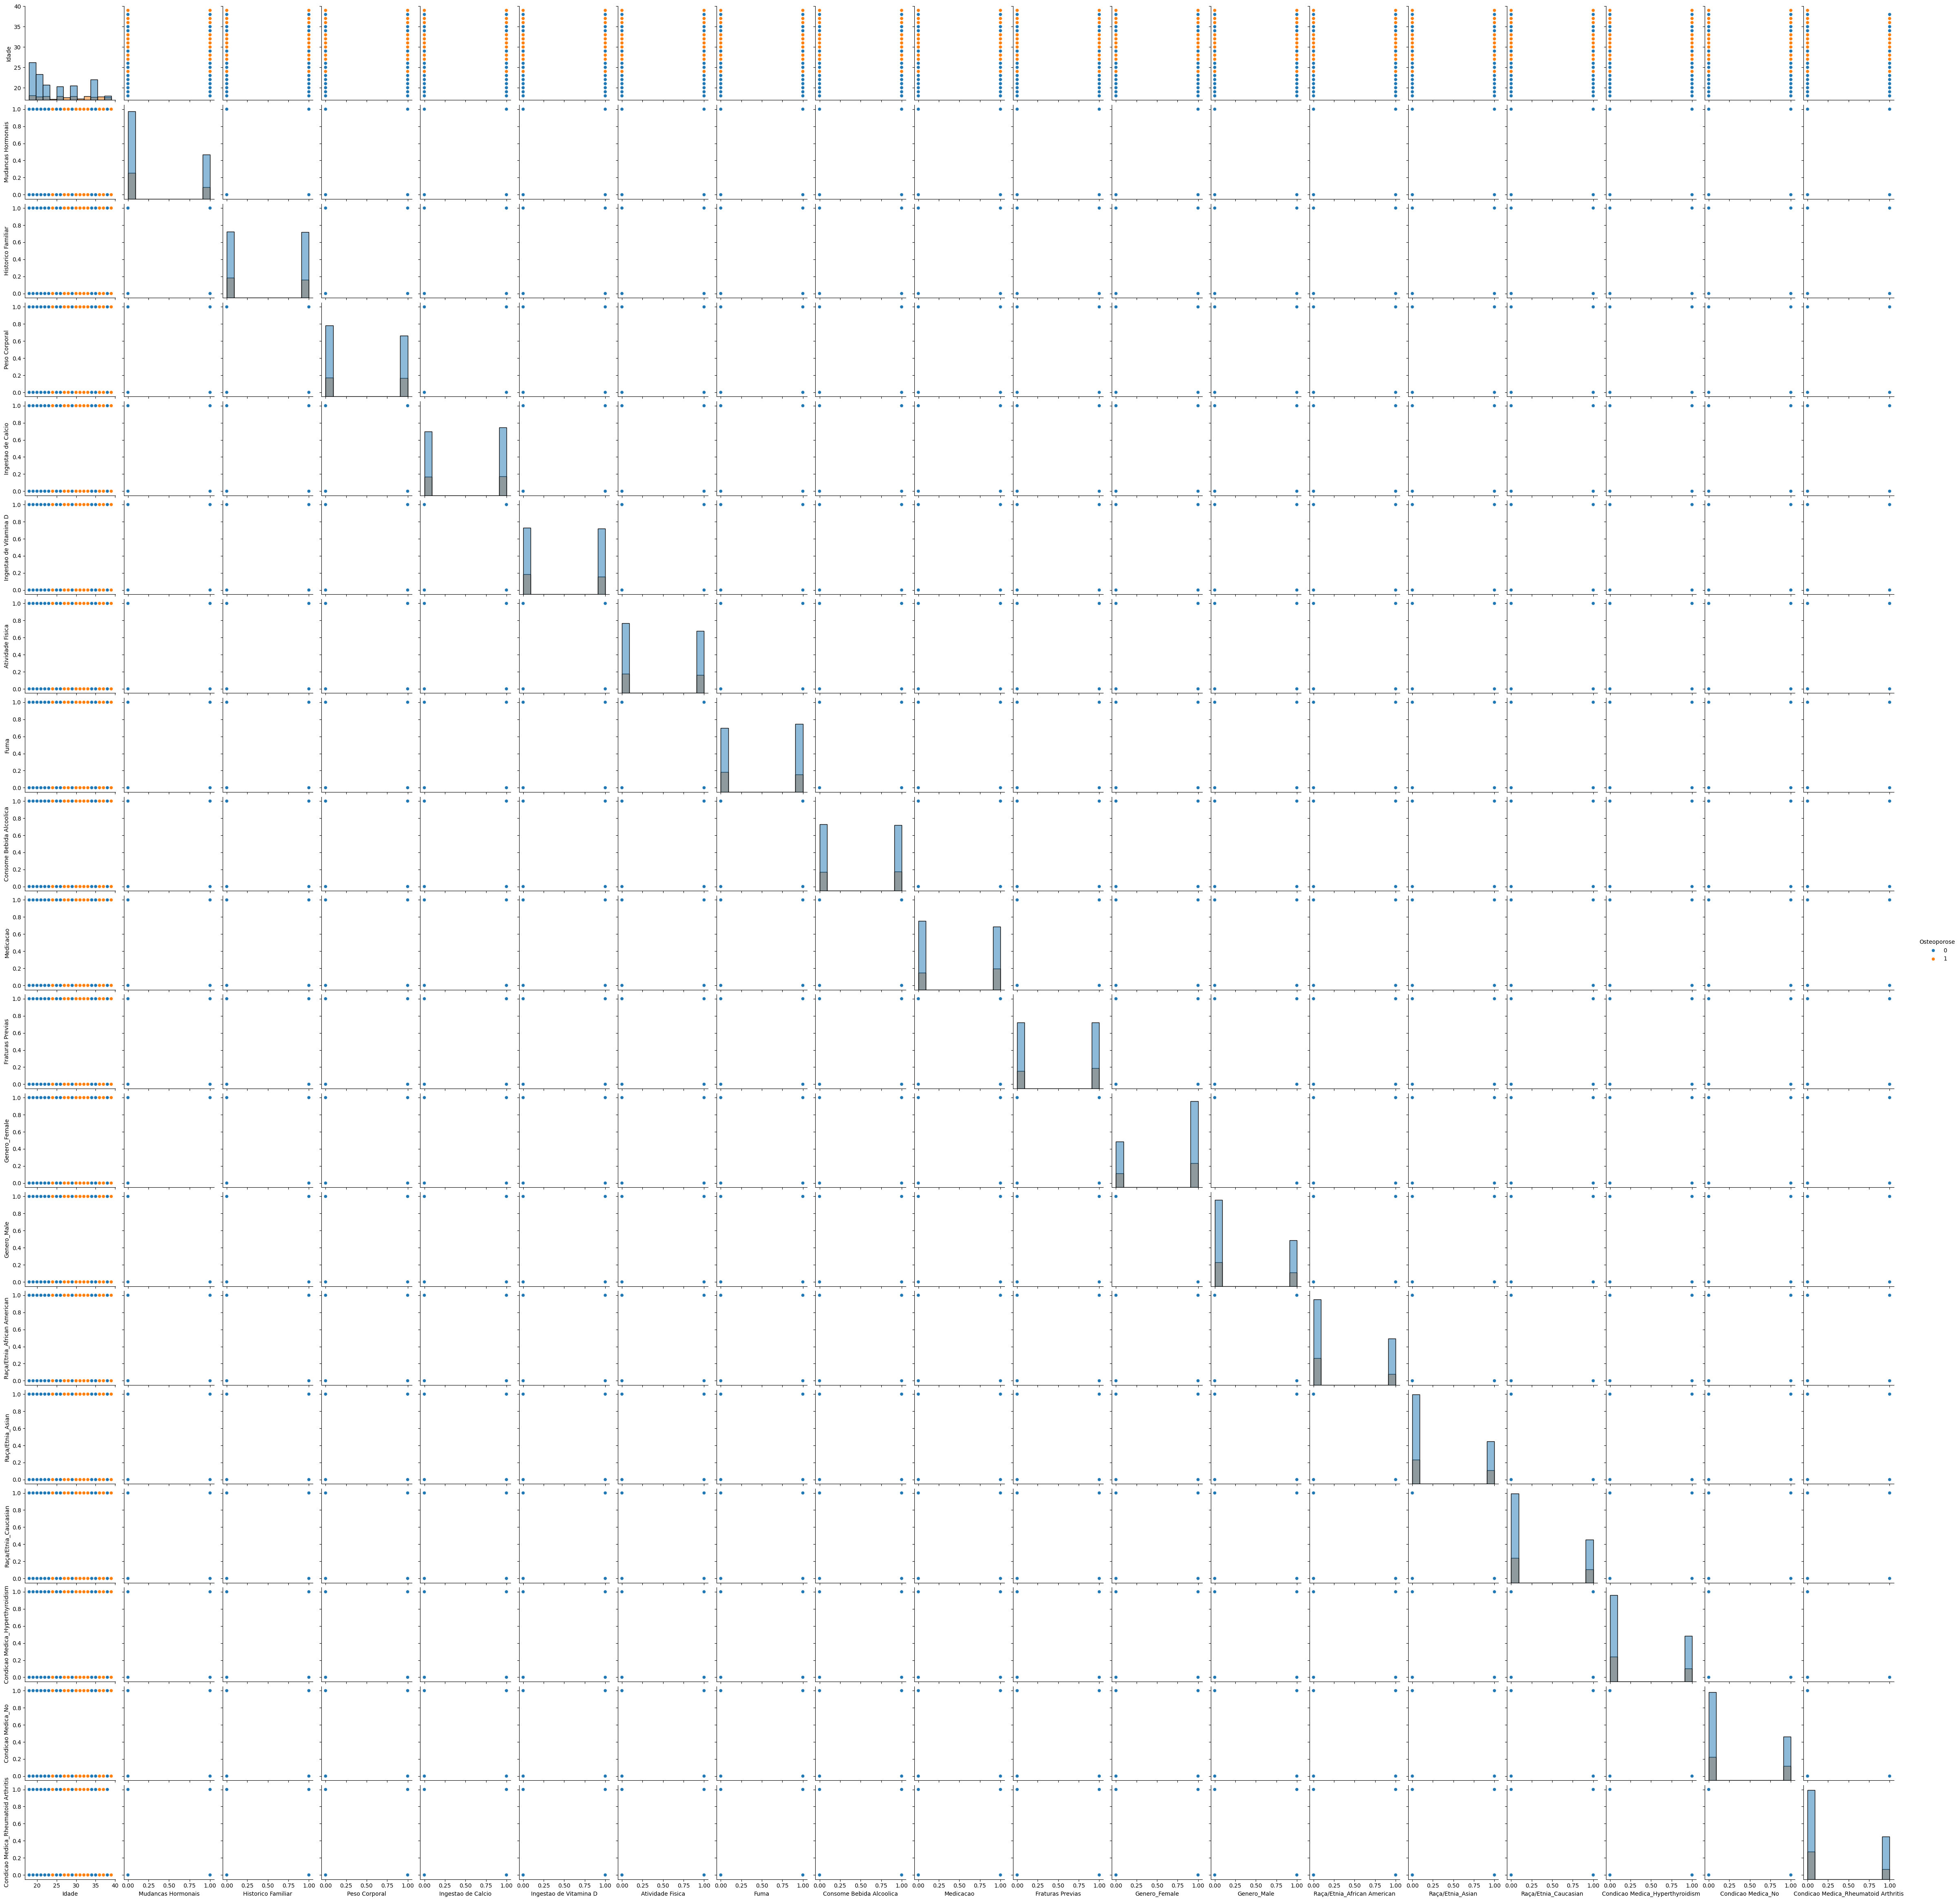

In [126]:
# verificar as correlacoes
sns.pairplot(novo_df, hue='Osteoporose', diag_kind='hist')

### Preparação Dos Dados

In [26]:
pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [122]:
# bibliotecas
import pandas as pd
import numpy as np

# Dividir os dados
from sklearn.model_selection import train_test_split

# Métricas de desempenho
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (confusion_matrix,
                            recall_score,
                            accuracy_score,
                            precision_score,
                            f1_score)

# Modelo Arvore de Decisão (decision Tree) e Floresta Aleatoria (Random Forest) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from shapash import SmartExplainer
from sklearn.ensemble import RandomForestClassifier

#bibliotecas para uso do SMOTEEN e RandomUnderSampler para balancear os dados
from imblearn.combine import SMOTEENN

from imblearn.combine import SMOTEENN
import seaborn as sns
from sklearn.model_selection import train_test_split

In [100]:
# Verificar a distribuicão da variavel alvo 'Osteoporose'
df['Osteoporose'].value_counts(True)

Osteoporose
0    0.777778
1    0.222222
Name: proportion, dtype: float64

In [101]:
# Separa as variáveis independentes das dependentes
X = df.drop('Osteoporose', axis=1)
Y = df['Osteoporose']

# Cria variáveis fictícias
X = pd.get_dummies(X, drop_first=True)

In [102]:
# Divide os dados em conjunto de treinamento, validação e teste

# Divide os dados em duas partes: Treinamento e Temporário
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.5, random_state=42, stratify=Y)

# Divide o conjunto temporário em validação e teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(481, 19) (289, 19) (193, 19)


In [103]:
# Verificando o equilíbrio da classe para dados completos, conjunto de treinamento, conjunto de validação e conjunto de teste

print("Razão do valor alvo em y")
print(Y.value_counts(1))
print("#" * 40)
print("Razão do valor alvo em y_train")
print(y_train.value_counts(1))
print("#" * 40)
print("Razão do valor alvo em y_val")
print(y_val.value_counts(1))
print("#" * 40)
print("Razão do valor alvo em y_test")
print(y_test.value_counts(1))
print("#" * 40)

Razão do valor alvo em y
Osteoporose
0    0.777778
1    0.222222
Name: proportion, dtype: float64
########################################
Razão do valor alvo em y_train
Osteoporose
0    0.777547
1    0.222453
Name: proportion, dtype: float64
########################################
Razão do valor alvo em y_val
Osteoporose
0    0.778547
1    0.221453
Name: proportion, dtype: float64
########################################
Razão do valor alvo em y_test
Osteoporose
0    0.777202
1    0.222798
Name: proportion, dtype: float64
########################################


In [104]:
#Balanceamento dos dados
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

Acima realizei balanceamento dos dados com SMOTEENN que é a tecnica de oversampling e undersampling que gera novos dados sinteticos da classe minoritaria e remove dados ruidosos da classe majoritária.

In [105]:
print("Distribuição de classes antes do resampling:")
print(sorted(Counter(y_train).items()))

print("Distribuição de classes após o resampling:")
print(sorted(Counter(y_resampled).items()))

Distribuição de classes antes do resampling:
[(0, 374), (1, 107)]
Distribuição de classes após o resampling:
[(0, 155), (1, 292)]


### Construção de Modelos de Previsão

#### Arvore de Decisao Classificadora

In [111]:
# Criar um modelo de classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Ajuste o modelo com os dados balanceados
clf.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [155]:
# comparar a importância relativa de cada recurso no modelo
print(pd.DataFrame(clf.feature_importances_, columns=['imp'], index=X_resampled.columns))

                                           imp
Idade                                 0.266019
Mudancas Hormonais                    0.032402
Historico Familiar                    0.062039
Peso Corporal                         0.040026
Ingestao de Calcio                    0.047396
Ingestao de Vitamina D                0.056266
Atividade Fisica                      0.033622
Fuma                                  0.051353
Consome Bebida Alcoolica              0.059787
Medicacao                             0.026815
Fraturas Previas                      0.037423
Genero_Female                         0.037498
Genero_Male                           0.032906
Raça/Etnia_African American           0.037366
Raça/Etnia_Asian                      0.027111
Raça/Etnia_Caucasian                  0.045844
Condicao Medica_Hyperthyroidism       0.045022
Condicao Medica_No                    0.022152
Condicao Medica_Rheumatoid Arthritis  0.038953


In [156]:
xpl = SmartExplainer(model=clf)
xpl.compile(X_train)
app = xpl.run_app()

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x3228da010>


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shapash/webapp/utils/utils.py:40: FutureWarning:

Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead

INFO:root:Your Shapash application run on http://MacBook-Air-de-Raquel.local:8050/
INFO:root:Use the method .kill() to down your app.


##### Desempenho do modelo construido com Arvore de Decisao (Decision Tree)

In [115]:
# Prever o alvo para os conjuntos de treinamento e validação
pred_train = dtree.predict(X_resampled)
pred_val = dtree.predict(X_val)

In [116]:
# Accuracy: mede a proporção de previsões corretas em relação ao total de previsões
print(accuracy_score(y_resampled, pred_train))
print(accuracy_score(y_val, pred_val))

0.8903803131991052
0.6262975778546713


In [117]:
#precision: mede a proporção de previsões positivas verdadeiras entre todas as previsões positivas.
print(precision_score(y_resampled, pred_train))
print(precision_score(y_val, pred_val))

0.8808777429467085
0.34057971014492755


In [118]:
#Recall (Sensibilidade): Mede a proporção de previsões positivas verdadeiras de todas as instâncias positivas reais.
print(recall_score(y_resampled, pred_train))
print(recall_score(y_val, pred_val))

0.9623287671232876
0.734375


In [119]:
# Pontuação F1: É a média harmônica de precisão e recuperação.
print(f1_score(y_resampled, pred_train))
print(f1_score(y_val, pred_val))

0.9198036006546645
0.46534653465346537


In [120]:
# Pontuação ROC AUC: Mede a área sob a curva característica de operação do receptor (ROC).
print(roc_auc_score(y_resampled, pred_train, multi_class='ovr'))
print(roc_auc_score(y_val, pred_val, multi_class='ovr'))

0.8585837384003536
0.6649652777777778


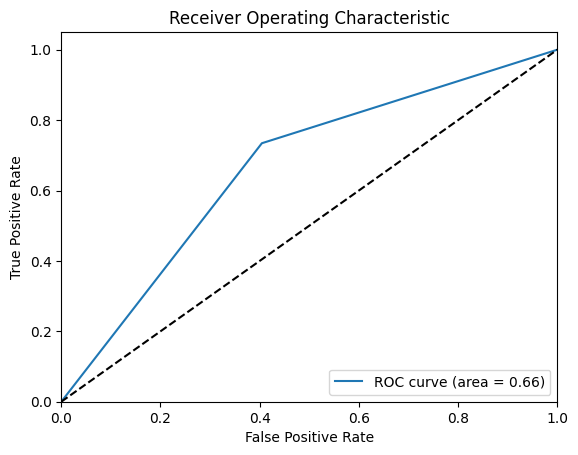

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcule a pontuação ROC AUC
roc_auc = roc_auc_score(y_val, pred_val, multi_class='ovr')

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_val, pred_val)

# Plote a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

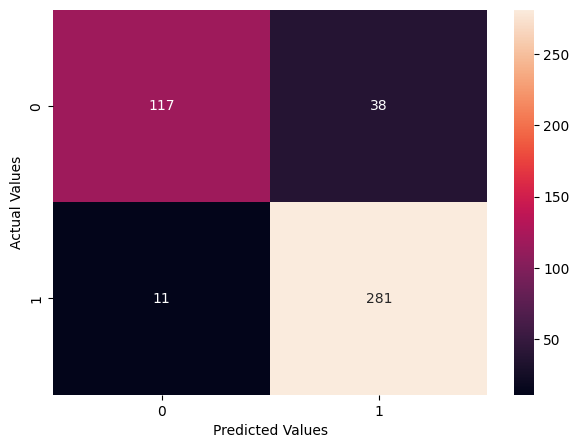

In [137]:
# Matriz de confusão para dados de treino com sobreamostragem
cm = confusion_matrix(y_resampled, pred_train)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

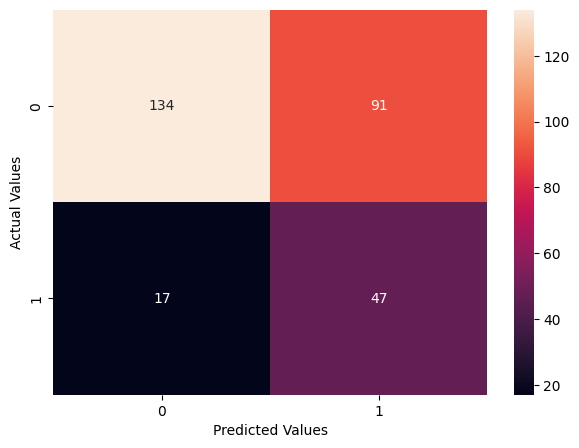

In [130]:
# Matriz de confusão para dados de treino com sobreamostragem
cm = confusion_matrix(y_val, pred_val)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Floresta Aleatoria Classificadora (Random Forest)

In [140]:
# Importando a classe RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instanciando o classificador
RFC = RandomForestClassifier(n_estimators=100)

# Supondo que X e y são os dados de treinamento
# Ajustando o modelo com os dados de treinamento
RFC.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [141]:
print(pd.DataFrame(RFC.feature_importances_, columns=['imp'], index=X_resampled.columns))

                                           imp
Idade                                 0.264113
Mudancas Hormonais                    0.036982
Historico Familiar                    0.062611
Peso Corporal                         0.039056
Ingestao de Calcio                    0.045759
Ingestao de Vitamina D                0.057503
Atividade Fisica                      0.034025
Fuma                                  0.057771
Consome Bebida Alcoolica              0.055188
Medicacao                             0.028142
Fraturas Previas                      0.043653
Genero_Female                         0.035801
Genero_Male                           0.032790
Raça/Etnia_African American           0.035364
Raça/Etnia_Asian                      0.029943
Raça/Etnia_Caucasian                  0.042381
Condicao Medica_Hyperthyroidism       0.041199
Condicao Medica_No                    0.022010
Condicao Medica_Rheumatoid Arthritis  0.035706


O SmartExplainerfrom shapashé uma ferramenta poderosa para explicar modelos de aprendizado de máquina. Fornece uma maneira simples e intuitiva de entender como seu modelo está fazendo previsões.

https://github.com/MAIF/shapash?tab=readme-ov-file

In [142]:
xpl = SmartExplainer(model=RFC)
xpl.compile(X_train)
app = xpl.run_app()

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x356d47250>


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shapash/webapp/utils/utils.py:40: FutureWarning:

Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead

INFO:root:Your Shapash application run on http://MacBook-Air-de-Raquel.local:8050/
INFO:root:Use the method .kill() to down your app.


##### Desempenho do Modelo Random Forest Construido

In [145]:
# Prever o alvo para os conjuntos de treinamento e validação
pred_RFC_train = RFC.predict(X_resampled)
pred_RFC_val = RFC.predict(X_val)

In [146]:
# Accuracy: mede a proporção de previsões corretas em relação ao total de previsões
print(accuracy_score(y_resampled, pred_RFC_train))
print(accuracy_score(y_val, pred_RFC_val))

1.0
0.6366782006920415


In [147]:
#precision: mede a proporção de previsões positivas verdadeiras entre todas as previsões positivas.
print(precision_score(y_resampled, pred_RFC_train))
print(precision_score(y_val, pred_RFC_val))

1.0
0.29292929292929293


In [148]:
#Recall (Sensibilidade): Mede a proporção de previsões positivas verdadeiras de todas as instâncias positivas reais.
print(recall_score(y_resampled, pred_RFC_train))
print(recall_score(y_val, pred_RFC_val))

1.0
0.453125


In [149]:
# Pontuação F1: É a média harmônica de precisão e recuperação.
print(f1_score(y_resampled, pred_RFC_train))
print(f1_score(y_val, pred_RFC_val))

1.0
0.3558282208588957


In [150]:
# Pontuação ROC AUC: Mede a área sob a curva característica de operação do receptor (ROC).
print(roc_auc_score(y_resampled, pred_RFC_train, multi_class='ovr'))
print(roc_auc_score(y_val, pred_RFC_val, multi_class='ovr'))

1.0
0.5710069444444444


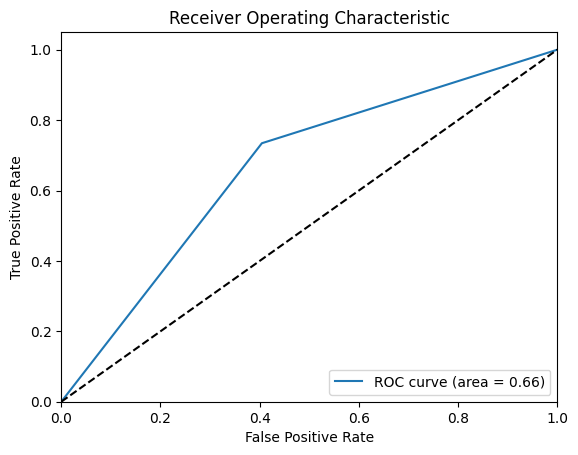

In [152]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcule a pontuação ROC AUC
roc_auc = roc_auc_score(y_val, pred_val, multi_class='ovr')

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_val, pred_val)

# Plote a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

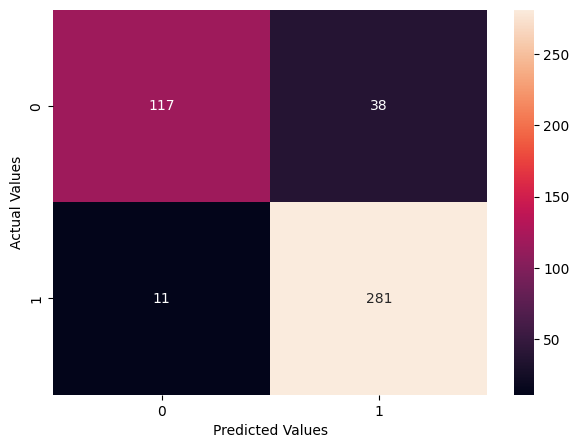

In [153]:
# Matriz de confusão para dados de treino com sobreamostragem
cm = confusion_matrix(y_resampled, pred_train)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Regressão Logistica (Logistic Regressions)

In [160]:
# Importando a classe LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instanciando o classificador
lr = LogisticRegression()

# Ajustando o modelo com os dados de treinamento
lr.fit(X_resampled, y_resampled)

LogisticRegression()

In [162]:
xpl = SmartExplainer(model=lr)
xpl.compile(X_train)
app = xpl.run_app()

INFO: Shap explainer type - shap.explainers.PermutationExplainer()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shapash/webapp/utils/utils.py:40: FutureWarning:

Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead

INFO:root:Your Shapash application run on http://MacBook-Air-de-Raquel.local:8050/
INFO:root:Use the method .kill() to down your app.


In [164]:
# Prever o alvo para os conjuntos de treinamento e validação
pred_train = lr.predict(X_resampled)
pred_val = lr.predict(X_val)

In [165]:
# Accuracy: mede a proporção de previsões corretas em relação ao total de previsões
print(accuracy_score(y_resampled, pred_train))
print(accuracy_score(y_val, pred_val))

0.8612975391498882
0.5882352941176471


In [166]:
#precision: mede a proporção de previsões positivas verdadeiras entre todas as previsões positivas.
print(precision_score(y_resampled, pred_train))
print(precision_score(y_val, pred_val))

0.8938356164383562
0.25225225225225223
